In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from spectraclass.data.base import DataManager
import xarray as xa
from spectraclass.xext.xgeo import XGeo
from spectraclass.data.spatial.manager import SpatialDataManager
from spectraclass.gui.spatial.basemap import TileServiceBasemap

In [2]:
data_type = "aviris"  # 'desis'
subset = [ 500, 1500, 500, 1500 ]
dm: DataManager = DataManager.initialize( "demo2", data_type )
tile_raster: xa.DataArray = DataManager.instance().modal.readSpectralData(subset=subset)
[x0,x1,y0,y1] = SpatialDataManager.extent( tile_raster )

Using config file: '/Users/tpmaxwel/.spectraclass/config/aviris/demo2.py'
Opening log file:  '/Users/tpmaxwel/.spectraclass/logging/aviris/demo2.log'
Completed Reading raster file /Users/tpmaxwel/Dropbox/Data/Aviris/ang20170720t004130/ang20170720t004130_corr_v2p9.tif, dims = ('band', 'y', 'x'), shape = (425, 1038, 1037), time=67.79934120178223 sec


Canvas(header_visible=False, toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Bac…
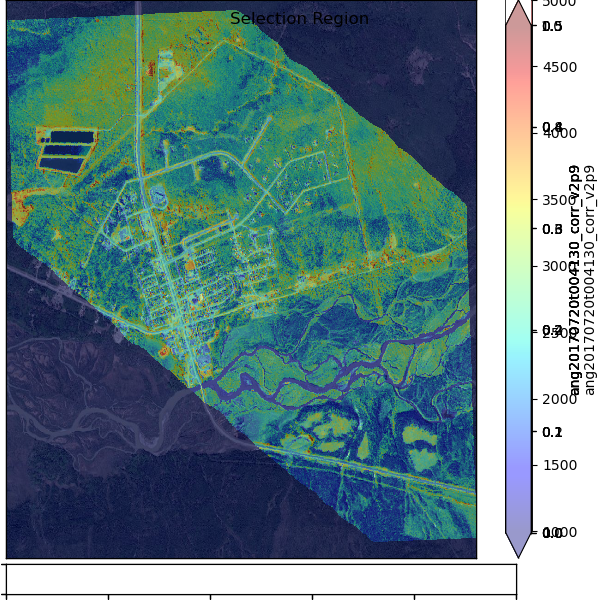

In [7]:
iband = 100
alpha = 0.4
vrange = [ 1000, 5000 ] if ( data_type == 'desis' ) else [ 0.0, 0.5 ]

base = TileServiceBasemap()
base.setup_plot( (x0 ,x1), (y0 ,y1), standalone=True )
raster_layer = tile_raster[iband].squeeze( drop=True )
raster_layer.plot.imshow( ax=base.gax, alpha=alpha, vmin=vrange[0], vmax=vrange[1], cmap="jet" )
plt.show()